In [1]:
import pandas as  pd
import numpy as np

In [2]:
data_train = pd.read_csv('train_features.csv')
data_test = pd.read_csv('test_features.csv')
data_train_target_ns = pd.read_csv('train_targets_nonscored.csv')
data_train_target_s = pd.read_csv('train_targets_scored.csv')

In [5]:
data_train.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [4]:
data_test.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_0004d9e33,trt_cp,24,D1,-0.5458,0.1306,-0.5135,0.4408,1.5500,-0.1644,...,0.0981,0.7978,-0.1430,-0.2067,-0.2303,-0.1193,0.0210,-0.0502,0.1510,-0.7750
1,id_001897cda,trt_cp,72,D1,-0.1829,0.2320,1.2080,-0.4522,-0.3652,-0.3319,...,-0.1190,-0.1852,-1.0310,-1.3670,-0.3690,-0.5382,0.0359,-0.4764,-1.3810,-0.7300
2,id_002429b5b,ctl_vehicle,24,D1,0.1852,-0.1404,-0.3911,0.1310,-1.4380,0.2455,...,-0.2261,0.3370,-1.3840,0.8604,-1.9530,-1.0140,0.8662,1.0160,0.4924,-0.1942
3,id_00276f245,trt_cp,24,D2,0.4828,0.1955,0.3825,0.4244,-0.5855,-1.2020,...,0.1260,0.1570,-0.1784,-1.1200,-0.4325,-0.9005,0.8131,-0.1305,0.5645,-0.5809
4,id_0027f1083,trt_cp,48,D1,-0.3979,-1.2680,1.9130,0.2057,-0.5864,-0.0166,...,0.4965,0.7578,-0.1580,1.0510,0.5742,1.0900,-0.2962,-0.5313,0.9931,1.8380


In [7]:
data_train_target_ns.head()

,sig_id,abc_transporter_expression_enhancer,abl_inhibitor,ace_inhibitor,acetylcholine_release_enhancer,adenosine_deaminase_inhibitor,adenosine_kinase_inhibitor,adenylyl_cyclase_inhibitor,age_inhibitor,alcohol_dehydrogenase_inhibitor,...,ve-cadherin_antagonist,vesicular_monoamine_transporter_inhibitor,vitamin_k_antagonist,voltage-gated_calcium_channel_ligand,voltage-gated_potassium_channel_activator,voltage-gated_sodium_channel_blocker,wdr5_mll_interaction_inhibitor,wnt_agonist,xanthine_oxidase_inhibitor,xiap_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data_train_target_s.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
shape = [data_train.shape, data_test.shape, data_train_target_ns.shape, data_train_target_s.shape]
shape

[(23814, 876), (3982, 876), (23814, 403), (23814, 207)]

In [45]:
gene_data = data_train.filter(regex='^g-',axis=1)

In [65]:
cell_data = data_train.filter(regex='^c-',axis=1)

In [12]:
data_test.filter(regex='^g-',axis=1).shape

(3982, 772)

In [13]:
data_test.filter(regex='^c-',axis=1).shape

(3982, 100)

In [17]:
data_train["sig_id"].nunique()

23814

In [21]:
data_train["cp_type"].value_counts()

trt_cp         21948
ctl_vehicle     1866
Name: cp_type, dtype: int64

In [22]:
data_train["cp_time"].value_counts()

48    8250
72    7792
24    7772
Name: cp_time, dtype: int64

In [23]:
data_train["cp_dose"].value_counts()

D1    12147
D2    11667
Name: cp_dose, dtype: int64

Text(0, 0.5, 'Count')

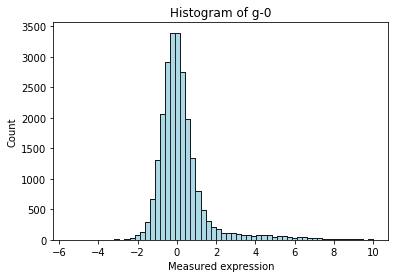

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
# matplotlib histogram
plt.hist(data_train['g-0'], color = 'lightblue', edgecolor = 'black',
         bins = int(300/5))


sns.distplot(data_train['g-0'], hist=True, kde=False, 
             bins=int(300/5), color = 'lightblue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of g-0')
plt.xlabel('Measured expression')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

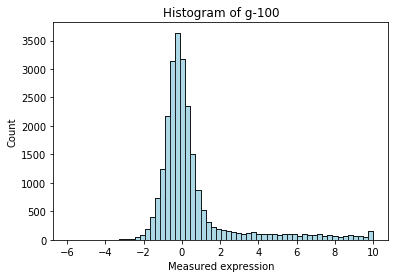

In [43]:
# matplotlib histogram
plt.hist(data_train['g-100'], color = 'lightblue', edgecolor = 'black',
         bins = int(300/5))


sns.distplot(data_train['g-100'], hist=True, kde=False, 
             bins=int(300/5), color = 'lightblue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of g-100')
plt.xlabel('Measured expression')
plt.ylabel('Count')

In [51]:
gene_min = gene_data.min()

In [52]:
gene_max = gene_data.max()

In [66]:
cell_min = cell_data.min()

In [67]:
cell_max = cell_data.max()

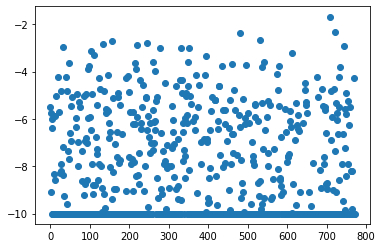

In [56]:
import numpy
import matplotlib.pyplot as plt


plt.scatter(range(len(gene_min)), [gene_min])
plt.show()

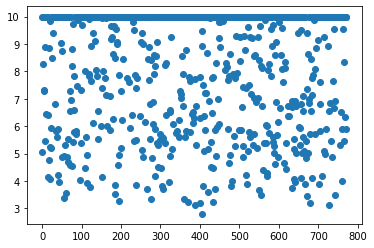

In [57]:
plt.scatter(range(len(gene_max)), [gene_max])
plt.show()

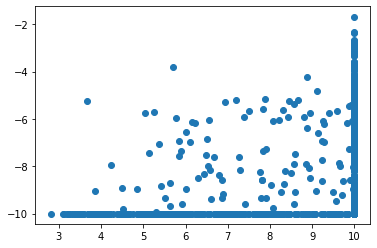

In [59]:
plt.scatter(gene_max, [gene_min])
plt.show()

In [60]:
gene_max

g-0      10.000
g-1       5.039
g-2       8.257
g-3      10.000
g-4      10.000
          ...  
g-767     6.317
g-768    10.000
g-769     5.911
g-770    10.000
g-771    10.000
Length: 772, dtype: float64

In [61]:
gene_min

g-0      -5.513
g-1      -5.737
g-2      -9.104
g-3      -5.998
g-4      -6.369
          ...  
g-767   -10.000
g-768    -4.269
g-769   -10.000
g-770   -10.000
g-771   -10.000
Length: 772, dtype: float64

Text(0, 0.5, 'Count')

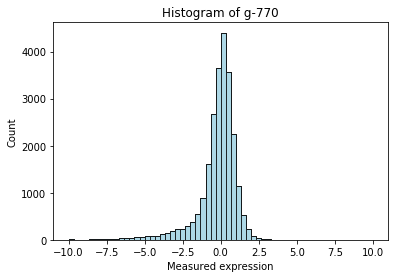

In [63]:
# matplotlib histogram
plt.hist(data_train['g-770'], color = 'lightblue', edgecolor = 'black',
         bins = int(300/5))


sns.distplot(data_train['g-770'], hist=True, kde=False, 
             bins=int(300/5), color = 'lightblue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of g-770')
plt.xlabel('Measured expression')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

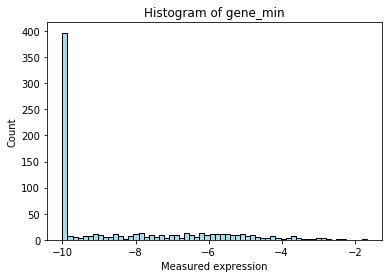

In [74]:
plt.hist(gene_min, color = 'lightblue', edgecolor = 'black',
         bins = int(300/5))
plt.title('Histogram of gene_min')
plt.xlabel('Measured expression')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

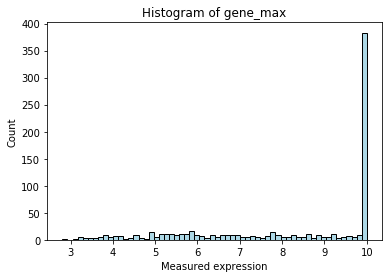

In [75]:
plt.hist(gene_max, color = 'lightblue', edgecolor = 'black',
         bins = int(300/5))
plt.title('Histogram of gene_max')
plt.xlabel('Measured expression')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

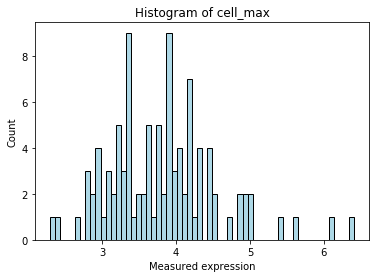

In [76]:
plt.hist(cell_max, color = 'lightblue', edgecolor = 'black',
         bins = int(300/5))
plt.title('Histogram of cell_max')
plt.xlabel('Measured expression')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

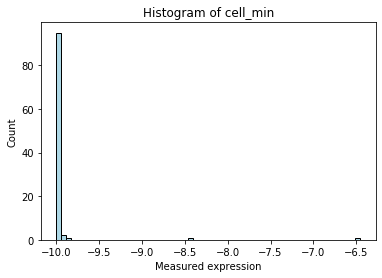

In [78]:
plt.hist(cell_min, color = 'lightblue', edgecolor = 'black',
         bins = int(300/5))
plt.title('Histogram of cell_min')
plt.xlabel('Measured expression')
plt.ylabel('Count')

In [79]:
data_train_target_s

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
x = data_train_target_s.drop(['sig_id'], axis=1).sum(axis=0).sort_values().reset_index()
x.columns = ['column', 'nonzero_records']

In [109]:
x

,column,nonzero_records
0,atp-sensitive_potassium_channel_antagonist,1
1,erbb2_inhibitor,1
2,diuretic,6
3,autotaxin_inhibitor,6
4,protein_phosphatase_inhibitor,6
...,...,...
201,serotonin_receptor_antagonist,404
202,dopamine_receptor_antagonist,424
203,cyclooxygenase_inhibitor,435
204,proteasome_inhibitor,726


In [117]:
y = data_train_target_s.drop(['sig_id'], axis=1).sum(axis=1).sort_values().reset_index()
y.columns = ['column', 'nonzero_records']

In [120]:
y['nonzero_records'].value_counts()

1    12532
0     9367
2     1538
3      303
4       55
5       13
7        6
Name: nonzero_records, dtype: int64